# Solutions week 10

# Exercise 1- Plotting
# Q1

In [ ]:
import matplotlib.pyplot as plt
import csv 
import numpy as np

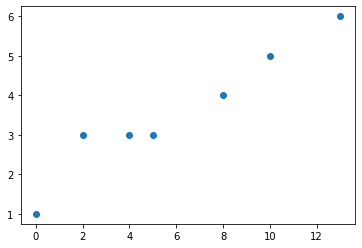

In [9]:


x = [0, 2, 4, 5, 8, 10, 13]
y = [1, 3, 3, 3, 4, 5, 6]

plt.plot(x, y, 'o')
plt.show()

# Q2

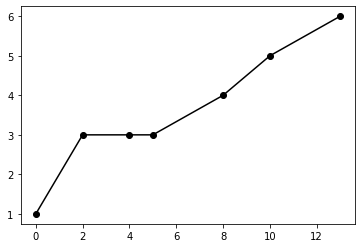

In [10]:
plt.plot(x, y, 'ko-')
plt.show()

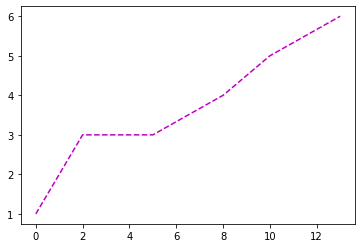

In [11]:
plt.plot(x, y, 'm--')
plt.show()

# Q3, Q4

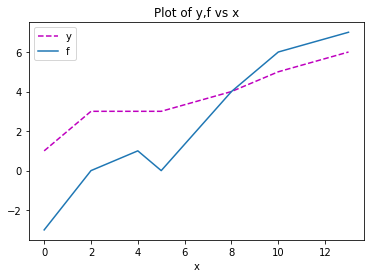

In [16]:
f = [-3, 0, 1, 0, 4, 6, 7]

plt.plot(x, y, 'm--', label='y')

plt.plot(x, f, label='f')

plt.title('Plot of y,f vs x')

plt.xlabel('x')

plt.legend()

plt.savefig('Exercise1.pdf')

plt.show()


# Exercise 2 - Importing data
# Q1

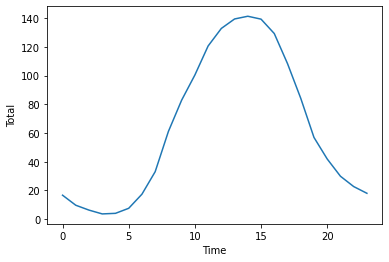

In [31]:


with open('hourly_cycle_count_weekend.csv') as f:
    
    r = csv.reader(f)
    
    r = list(r)
    
time = [float(i[0]) for i in r[1:]]
total = [float(i[1]) for i in r[1:]]

plt.xlabel('Time')
plt.ylabel('Total')


plt.plot(time, total)

# Q2

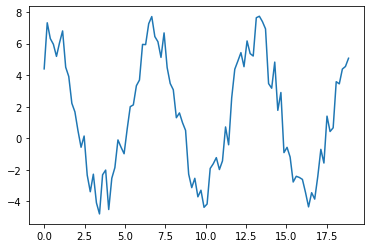

In [39]:


with open('signal_data.csv') as f:
    r = csv.reader(f)
    r = list(r)
    
x = [float(i) for i in r[0]]
y = [float(i) for i in r[1]]
    
plt.plot(x, y)
plt.show()

# Q3

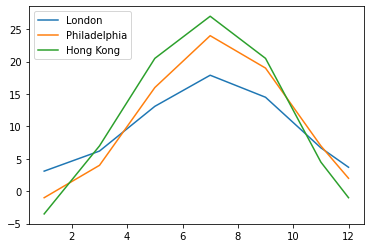

In [56]:


with open('temperature_data.txt') as f:
    r = csv.reader(f, delimiter=' ')
    r = list(r)
    
month = [int(i) for i in r[0][1:]]
london = [float(i) for i in r[1][1:]]
phil = [float(i) for i in r[2][1:]]
hk = [float(i) for i in r[3][1:]]

plt.plot(month, london, label='London')
plt.plot(month, phil, label='Philadelphia')
plt.plot(month, hk, label='Hong Kong')

plt.legend()

plt.show()
    

# Exercise 3
# Q1

Text(0, 0.5, 'Bend strength Nm2')

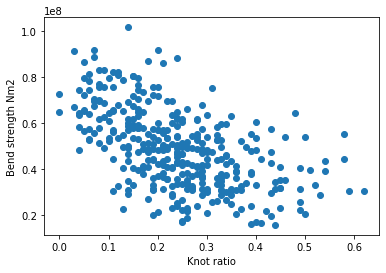

In [78]:


with open('douglas_data.csv') as f:
    r = csv.reader(f)
    r = list(r)

    
bend_strength = [float(i[-1]) for i in r[2:]]
bend_strength = np.array(bend_strength)
bend_strength_Nm2 = bend_strength * 10**6


knot_ratio = np.array([float(i[2]) for i in r[2:]])

plt.plot(knot_ratio, bend_strength_Nm2, 'o')
plt.xlabel('Knot ratio')
plt.ylabel('Bend strength Nm2')



# Q2


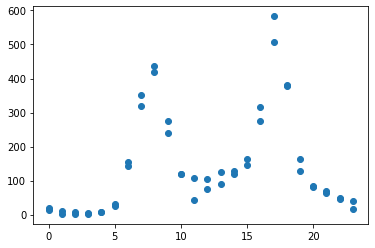

In [103]:

with open('FremontBridge.csv') as f:
    r = csv.reader(f)
    
    r = list(r)
    
time = [i[0] for i in r[1:49]]
time = [int(i[:2]) for i in time]

total = [int(i[1]) for i in r[1:49]]

plt.plot(time, total, 'o')
    

# Exercise 4 - Curve fitting
# Q1

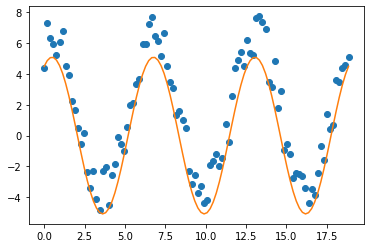

In [146]:
from scipy.optimize import curve_fit

with open('signal_data.csv') as f:
    r = csv.reader(f)
    r = list(r)
    
x = np.array([float(i) for i in r[0]])
y = np.array([float(i) for i in r[1]])


def sin_func(x, a, b):
    return b * np.sin(x + a)


c, cov = curve_fit(sin_func, x, y)

y_fit = sin_func(x, *c)

    
plt.plot(x, y, 'o')
plt.plot(x, y_fit)
plt.savefig('signal.png')
plt.show()


# Q2

[ 3.1  6.2 13.1 17.9 14.5  6.7  3.7]
[-1.  4. 16. 24. 19.  7.  2.]
[-3.5  7.  20.5 27.  20.5  4.5 -1. ]


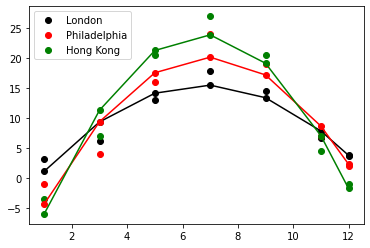

In [147]:
with open('temperature_data.txt') as f:
    r = csv.reader(f, delimiter=' ')
    r = list(r)
    
month = np.array([int(i) for i in r[0][1:]])
london = np.array([float(i) for i in r[1][1:]])
phil = np.array([float(i) for i in r[2][1:]])
hk = np.array([float(i) for i in r[3][1:]])

specs = ['ko', 'ro', 'go']

plt.plot(month, london, specs[0] , label='London')
plt.plot(month, phil, specs[1] , label='Philadelphia')
plt.plot(month, hk, specs[2] , label='Hong Kong')


def poly(x, a, b, c):
    return a*x**2 + b*x + c

fitted_data = []

for city, spec in zip([london, phil, hk], specs):
    print(city)
    c, cov = curve_fit(poly, month, city)
    fit = poly(month, *c)
    fitted_data.append(fit)
    plt.plot(month, fit, spec+'-')
    


plt.legend()
plt.savefig('temperature_fitted.pdf')
plt.show()

# Exercise 5 - Exporting Data
# Q1

In [150]:
with open('signal_fitted.csv', 'w') as f:
    w = csv.writer(f)
    w.writerows([x, y, y_fit])

# Q2

In [151]:
with open('temperature_fitted.txt', 'w') as f:
    w = csv.writer(f, delimiter=' ')
    w.writerow(month)
    w.writerows(fitted_data)

# Exercise 6 -  Curve Fitting for Modelling

# Q1

[14323473.042696327, 13844687.039956551, 13841869.250710903]
degree 3 gives best fit


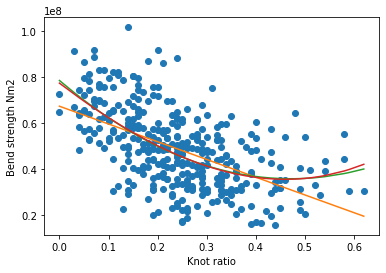

In [161]:
with open('douglas_data.csv') as f:
    r = csv.reader(f)
    r = list(r)

bend_strength = [float(i[-1]) for i in r[2:]]
bend_strength = np.array(bend_strength)
bend_strength_Nm2 = bend_strength * 10**6

knot_ratio = np.array([float(i[2]) for i in r[2:]])

plt.plot(knot_ratio, bend_strength_Nm2, 'o')
plt.xlabel('Knot ratio')
plt.ylabel('Bend strength Nm2')

def poly1d(x, a, b):
    return a*x + b

def poly2d(x, a, b, c):
    return a*x**2 + b*x + c

def poly3d(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

def RMSE(x, y, yfit):
    """
    Returns the RMSE of fitted data and raw data
    Data should be numpy array
    """
    
    e = (yfit - y) # Array, error for each data point

    return np.sqrt(np.sum(e**2)/ len(x)) 

rmse = []

for func in [poly1d, poly2d, poly3d]:
    c, cov = curve_fit(func, knot_ratio, bend_strength_Nm2)
    f_fit = func(knot_ratio, *c)
    
    new = sorted(zip(knot_ratio, f_fit))   
    x_sorted = [i[0] for i in new]
    y_sorted = [i[1] for i in new]
    
    rmse.append(RMSE(knot_ratio, bend_strength_Nm2, f_fit))
    
    plt.plot(x_sorted, y_sorted)
   

print(rmse)

if rmse[0] == min(rmse):
    print('degree 1 gives best fit')
elif rmse[1] == min(rmse):
    print('degree 2 gives best fit')
elif rmse[2] == min(rmse):
    print('degree 3 gives best fit')
    

plt.savefig('beams.pdf')

# Exercise 7



[ 1  3  5  7  9 11 12]
1.120896056701988 9.363075399303519 14.157812304185793 15.505106771348803 13.404958800792553 11.062093901369703


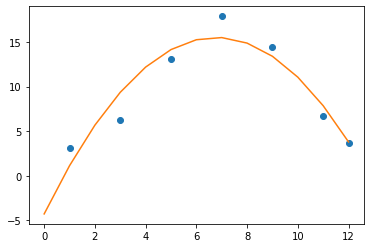

In [173]:
with open('temperature_data.txt') as f:
    r = csv.reader(f, delimiter=' ')
    r = list(r)
    
month = np.array([int(i) for i in r[0][1:]])
london = np.array([float(i) for i in r[1][1:]])

print(month)


plt.plot(month, london, 'o')


def poly(x, a, b, c):
    return a*x**2 + b*x + c

months = np.array(range(13))

c, cov = curve_fit(poly, month, london)
fit = poly(months, *c)

plt.plot(months, fit)

print(fit[1], fit[3], fit[5], fit[7], fit[9], fit[10])

